MOVIE STUDIO EDA - Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

In this project, my main areas of focus were:

1. How do production budgets affect profits?
2. Which Genres perform best both in ratings?
3. Which are the highest grossing movies?

##STEP 1: LOADING THE DATA FILES

I decided to load and inspect the data files in order to decide which files are relevant for my study. Documentation for the methods used can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [2]:
#importing the relevant packages
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the SQLite database
conn = sqlite3.connect('im.db')


In [4]:
# Loading the basics CSV with UTF-8 encoding
info = pd.read_csv('rt.movie_info.tsv.gz', compression='gzip', delimiter='\t', encoding='utf-8')

# Loading the ratings CSV with 'latin1' encoding
try:
    reviews = pd.read_csv('rt.reviews.tsv.gz', compression='gzip', delimiter='\t', encoding='utf-8')
except UnicodeDecodeError:
    reviews = pd.read_csv('rt.reviews.tsv.gz', compression='gzip', delimiter='\t', encoding='latin1')

# Loading the gross CSV with UTF-8 encoding
gross = pd.read_csv('tmdb.movies.csv.gz', compression='gzip', index_col=0, encoding='utf-8')

# Loading the budgets CSV with UTF-8 encoding
budgets = pd.read_csv('tn.movie_budgets.csv.gz', compression='gzip', index_col=0, encoding='utf-8')

reviews.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


##STEP TWO: DATA CLEANING AND INSPECTION

In [5]:
# Inspect column data types
print(budgets.dtypes)

# Convert columns to strings if necessary
budgets['production_budget'] = budgets['production_budget'].astype(str)
budgets['domestic_gross'] = budgets['domestic_gross'].astype(str)
budgets['worldwide_gross'] = budgets['worldwide_gross'].astype(str)

# Clean the columns
budgets['production_budget'] = budgets['production_budget'].str.replace('[\$,]', '', regex=True).astype(float)
budgets['domestic_gross'] = budgets['domestic_gross'].str.replace('[\$,]', '', regex=True).astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].str.replace('[\$,]', '', regex=True).astype(float)

# Set pandas display option for floats
pd.set_option('display.float_format', '{:,.2f}'.format)


# Print cleaned production DataFrame
print(budgets.head())

release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object
    release_date                                        movie  \
id                                                              
1   Dec 18, 2009                                       Avatar   
2   May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
3    Jun 7, 2019                                 Dark Phoenix   
4    May 1, 2015                      Avengers: Age of Ultron   
5   Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

    production_budget  domestic_gross  worldwide_gross  
id                                                      
1      425,000,000.00  760,507,625.00 2,776,345,279.00  
2      410,600,000.00  241,063,875.00 1,045,663,875.00  
3      350,000,000.00   42,762,350.00   149,762,350.00  
4      330,600,000.00  459,005,868.00 1,403,013,963.00  
5      317,000,000.00  620,181,382.00 1,316,721,

In [6]:
# Descriptive Statistics
print(budgets.describe())
print(gross.describe())

       production_budget  domestic_gross  worldwide_gross
count           5,782.00        5,782.00         5,782.00
mean       31,587,757.10   41,873,326.87    91,487,460.91
std        41,812,076.83   68,240,597.36   174,719,968.78
min             1,100.00            0.00             0.00
25%         5,000,000.00    1,429,534.50     4,125,414.75
50%        17,000,000.00   17,225,945.00    27,984,448.50
75%        40,000,000.00   52,348,661.50    97,645,836.50
max       425,000,000.00  936,662,225.00 2,776,345,279.00
              id  popularity  vote_average  vote_count
count  26,517.00   26,517.00     26,517.00   26,517.00
mean  295,050.15        3.13          5.99      194.22
std   153,661.62        4.36          1.85      960.96
min        27.00        0.60          0.00        1.00
25%   157,851.00        0.60          5.00        2.00
50%   309,581.00        1.37          6.00        5.00
75%   419,542.00        3.69          7.00       28.00
max   608,444.00       80.77         1

STEP THREE: DATA VISUALIZATION

Question 1: How do Production budgets affect profits?


I Started off by checking the NaN values, then opted to use the mean to fill the NaN values. Reason being, By filling NaN values with the mean of the column, I intend to preserve the central tendency of the data. This means that the overall distribution and characteristics of the data are less likely to be skewed compared to using other methods like filling with zeros or the median.

release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


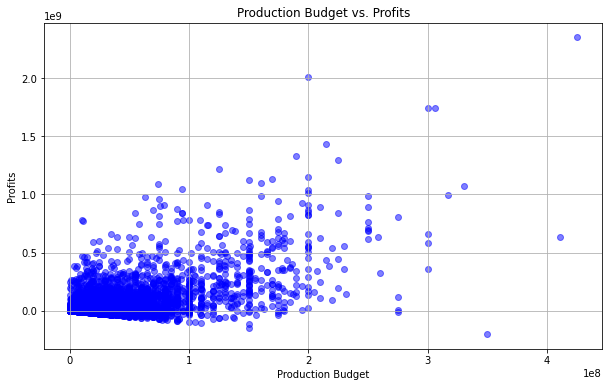

In [7]:
# Checking data types and missing values
print(budgets.dtypes)
print(budgets.isnull().sum())

# Convert 'production_budget' and 'worldwide_gross' columns to float
budgets['production_budget'] = budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Calculate profits
budgets['profit'] = budgets['worldwide_gross'] - budgets['production_budget']

# Fill NaN values in the 'profit' column with the mean of the column
budgets['profit'].fillna(budgets['profit'].mean(), inplace=True)

# Visualize production budget vs. profits
plt.figure(figsize=(10, 6))
plt.scatter(budgets['production_budget'], budgets['profit'], color='blue', alpha=0.5)
plt.xlabel('Production Budget')
plt.ylabel('Profits')
plt.title('Production Budget vs. Profits')
plt.grid(True)
plt.show()



The above plot shows a generally increasing trend from left to right, it suggests that higher production budgets are associated with higher profits. By employing good quality production techniques, Microsoft could guarantee higher returns on investment.The main assumption being that, good quality production is expensive. There is one outlier, which is The Avatar movie.

##QUESTION 2: Which Genres perform best in terms of ratings?

I referred to the pandas .numeric documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html) So that if there are any values that cannot be converted to numeric format, Pandas will replace them with NaN. The findings show that the ratings are skewed.

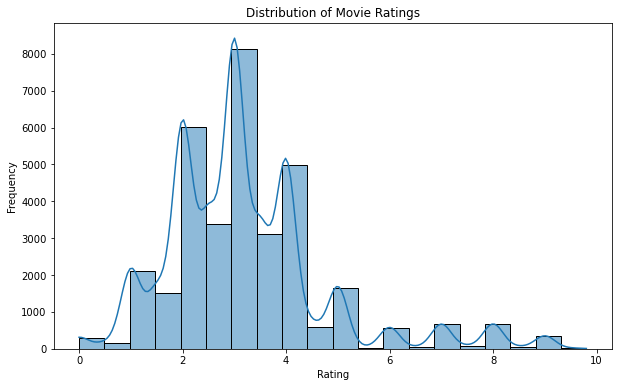

In [8]:
# Extract the numeric part of the ratings
reviews['rating'] = reviews['rating'].str.split('/').str[0]

# Convert the ratings to numeric format
reviews['rating'] = pd.to_numeric(reviews['rating'], errors='coerce')

# Drop NaN values in the 'rating' column
reviews = reviews.dropna(subset=['rating'])

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=reviews, x='rating', bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Loading the SQLite database
conn = sqlite3.connect('im.db')
# Defining the SQL query with the join operation
query = """
    SELECT b.genres,
           b.primary_title AS movie_title,
           r.averagerating AS average_rating,
           r.numvotes
    FROM movie_basics AS b
    JOIN movie_ratings AS r ON b.movie_id = r.movie_id;
"""

# Using pd.read_sql_query to pass the SQL query and connection object
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Splitting the genres into individual genres and explode the DataFrame
#
df['genres'] = df['genres'].str.split(',')
df = df.explode('genres')

# Group by genre and calculate the average rating for each genre
genre_ratings = df.groupby('genres')['average_rating'].mean().reset_index()

# Sort genres based on average rating in descending order and select the top 10
top_10_genres = genre_ratings.sort_values(by='average_rating', ascending=False).head(10)

# Initialize an empty DataFrame to store top rated movies by genre
top_rated_movies_by_genre = pd.DataFrame(columns=['genres', 'movie_title', 'average_rating'])

# For each genre in the top 10, select the top rated movie
for genre in top_10_genres['genres']:
    top_movie = df[df['genres'] == genre].nlargest(1, 'average_rating')
    top_rated_movies_by_genre = pd.concat([top_rated_movies_by_genre, top_movie])

# Reset the index of the resulting DataFrame
top_rated_movies_by_genre.reset_index(drop=True, inplace=True)

# Display the top rated movies by genre
print(top_rated_movies_by_genre)

# Visualize the top rated movies by genre
plt.figure(figsize=(12, 8))
sns.barplot(data=top_rated_movies_by_genre, x='average_rating', y='genres', palette='viridis')
plt.title('Top Rated Movies by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()


DatabaseError: Execution failed on sql '
    SELECT b.genres,
           b.primary_title AS movie_title,
           r.averagerating AS average_rating,
           r.numvotes
    FROM movie_basics AS b
    JOIN movie_ratings AS r ON b.movie_id = r.movie_id;
': no such table: movie_basics

In [17]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('im.db')

# Query to list all tables in the database
query = "SELECT * FROM movie_ratings;"
tables = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

print(tables)


DatabaseError: Execution failed on sql 'SELECT * FROM movie_ratings;': no such table: movie_ratings